<a href="https://colab.research.google.com/github/Eswarkartheekgrandhi/Basic-ML/blob/main/Untitledd9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/detect/archiveeee.zip -d project

Archive:  /content/drive/MyDrive/detect/archiveeee.zip
  inflating: project/archiveeee/classes.names  
   creating: project/archiveeee/dataset/
  inflating: project/archiveeee/dataset/dataset.yaml  
   creating: project/archiveeee/dataset/images/
   creating: project/archiveeee/dataset/images/train/
   creating: project/archiveeee/dataset/images/val/
   creating: project/archiveeee/dataset/labels/
   creating: project/archiveeee/dataset/labels/train/
   creating: project/archiveeee/dataset/labels/val/
  inflating: project/archiveeee/getting-full-path.py  
  inflating: project/archiveeee/test.txt  
  inflating: project/archiveeee/traffic-sign-to-test.mp4  
  inflating: project/archiveeee/train.txt  
   creating: project/archiveeee/ts/
   creating: project/archiveeee/ts/ts/
  inflating: project/archiveeee/ts/ts/00000.jpg  
  inflating: project/archiveeee/ts/ts/00000.txt  
  inflating: project/archiveeee/ts/ts/00001.jpg  
  inflating: project/archiveeee/ts/ts/00001.txt  
  inflating: proj

In [2]:
!unzip /content/drive/MyDrive/detect/yolov5-master.zip -d yolov5

Archive:  /content/drive/MyDrive/detect/yolov5-master.zip
   creating: yolov5/yolov5-master/yolov5-master/
  inflating: yolov5/yolov5-master/yolov5-master/.dockerignore  
  inflating: yolov5/yolov5-master/yolov5-master/.gitattributes  
   creating: yolov5/yolov5-master/yolov5-master/.github/
  inflating: yolov5/yolov5-master/yolov5-master/.github/dependabot.yml  
   creating: yolov5/yolov5-master/yolov5-master/.github/ISSUE_TEMPLATE/
  inflating: yolov5/yolov5-master/yolov5-master/.github/ISSUE_TEMPLATE/bug-report.yml  
  inflating: yolov5/yolov5-master/yolov5-master/.github/ISSUE_TEMPLATE/config.yml  
  inflating: yolov5/yolov5-master/yolov5-master/.github/ISSUE_TEMPLATE/feature-request.yml  
  inflating: yolov5/yolov5-master/yolov5-master/.github/ISSUE_TEMPLATE/question.yml  
  inflating: yolov5/yolov5-master/yolov5-master/.github/PULL_REQUEST_TEMPLATE.md  
   creating: yolov5/yolov5-master/yolov5-master/.github/workflows/
  inflating: yolov5/yolov5-master/yolov5-master/.github/workf

In [3]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [4]:
%cd yolov5/

/content/yolov5


In [5]:
!pip install -r /content/yolov5/yolov5-master/yolov5-master/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.8 MB/s eta 0:00:00


In [6]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/content/project/archiveeee/dataset/images/train"
val_path = "/content/project/archiveeee/dataset/images/val"
crs_path = "/content/project/archiveeee/ts/ts"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)

training images are :  592
validation images are :  148


In [7]:
len(imgs)

741

In [8]:
train_image_path = "/content/project/archiveeee/dataset/images/train"
train_label_path = "/content/project/archiveeee/dataset/labels/train"
val_image_path = "/content/project/archiveeee/dataset/images/val"
val_label_path = "/content/project/archiveeee/dataset/labels/val"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)
    
# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
print("images length - ",len(imgs))
print(imgs,xmls)
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
# shutil.copytree(crs_path,val_path)

images length -  1
['00473.jpg'] ['00473.txt']


In [10]:
with open(r'/content/project/archiveeee/dataset/dataset.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /content/project/archiveeee/dataset/images/train/\n', 'val: /content/project/archiveeee/dataset/images/val/\n', '\n', 'nc: 4\n', '\n', 'names: ["speed limit", "yield", "mandatory", "other"]\n']


In [11]:
!wandb disabled
!python /content/yolov5/yolov5-master/yolov5-master/train.py --img 415 --batch 16 --epochs 10 --data /content/project/archiveeee/dataset/dataset.yaml --weights yolov5s.pt --cache --workers 2

/bin/bash: wandb: command not found
train: weights=yolov5s.pt, cfg=, data=/content/project/archiveeee/dataset/dataset.yaml, hyp=yolov5-master/yolov5-master/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=yolov5-master/yolov5-master/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2023-2-2 Python-3.8.10 torch-1.13.1+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr

In [14]:
!python /content/yolov5/yolov5-master/yolov5-master/detect.py --source /content/project/archiveeee/dataset/images/val/00035.jpg --weights /content/yolov5/yolov5-master/yolov5-master/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/yolov5-master/yolov5-master/runs/train/exp/weights/best.pt'], source=/content/project/archiveeee/dataset/images/val/00035.jpg, data=yolov5-master/yolov5-master/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5-master/yolov5-master/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-2-2 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/project/archiveeee/dataset/images/val/00035.jpg: 384x640 2 speed limits, 263.1ms
Speed: 5.5ms pre-process, 263.1ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5-master/yolov5-master/runs/d

In [15]:
!ls /content/yolov5/yolov5-master/yolov5-master/runs/detect/exp2

00035.jpg


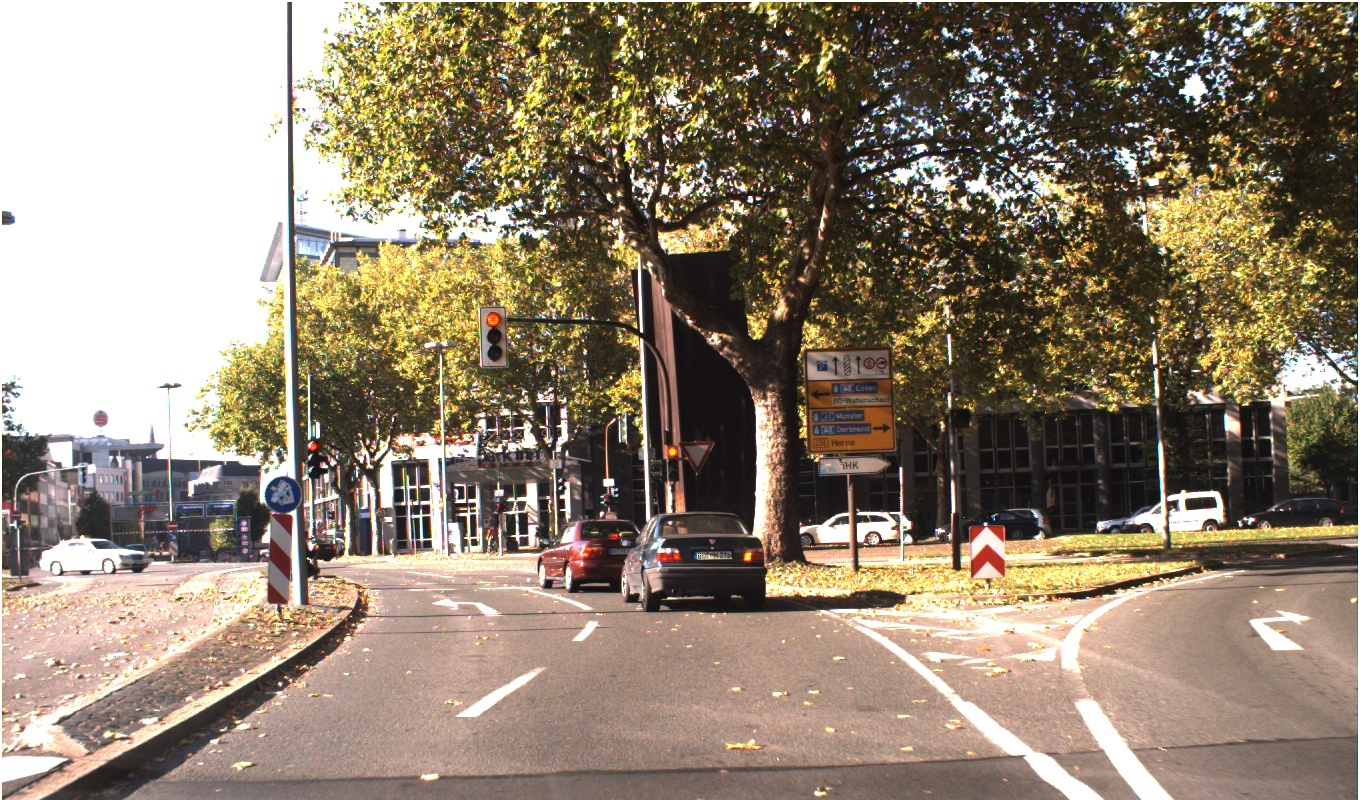

In [16]:
Image(filename='/content/project/archiveeee/dataset/images/val/00035.jpg', width=416)

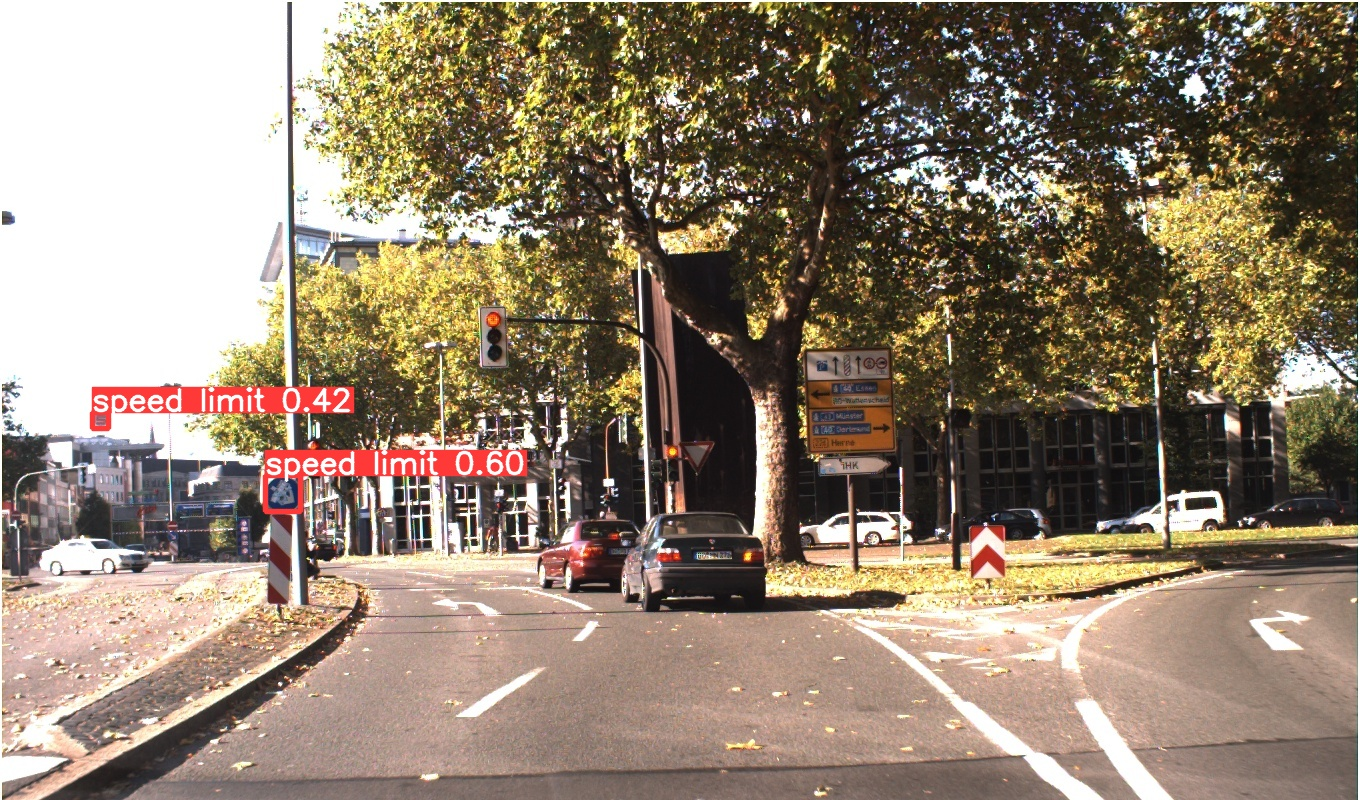

In [17]:
Image(filename='/content/yolov5/yolov5-master/yolov5-master/runs/detect/exp2/00035.jpg', width=416)

In [19]:
!python /content/yolov5/yolov5-master/yolov5-master/detect.py --source /content/project/archiveeee/dataset/images/val/00040.jpg --weights /content/yolov5/yolov5-master/yolov5-master/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/yolov5-master/yolov5-master/runs/train/exp/weights/best.pt'], source=/content/project/archiveeee/dataset/images/val/00040.jpg, data=yolov5-master/yolov5-master/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5-master/yolov5-master/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-2-2 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/project/archiveeee/dataset/images/val/00040.jpg: 384x640 2 speed limits, 428.4ms
Speed: 8.1ms pre-process, 428.4ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5-master/yolov5-master/runs/d

In [20]:
!ls /content/yolov5/yolov5-master/yolov5-master/runs/detect/exp3

00040.jpg


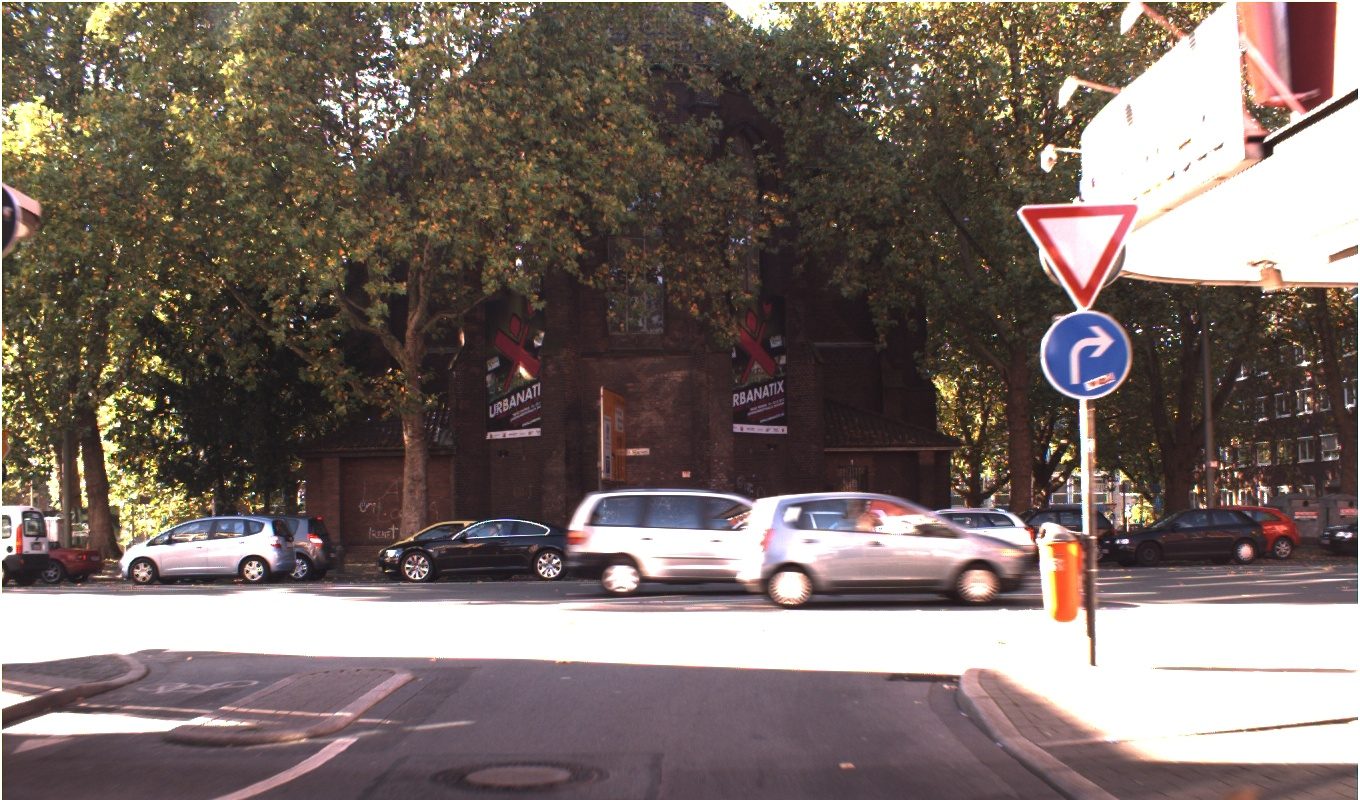

In [21]:
Image(filename='/content/project/archiveeee/dataset/images/val/00040.jpg', width=416)

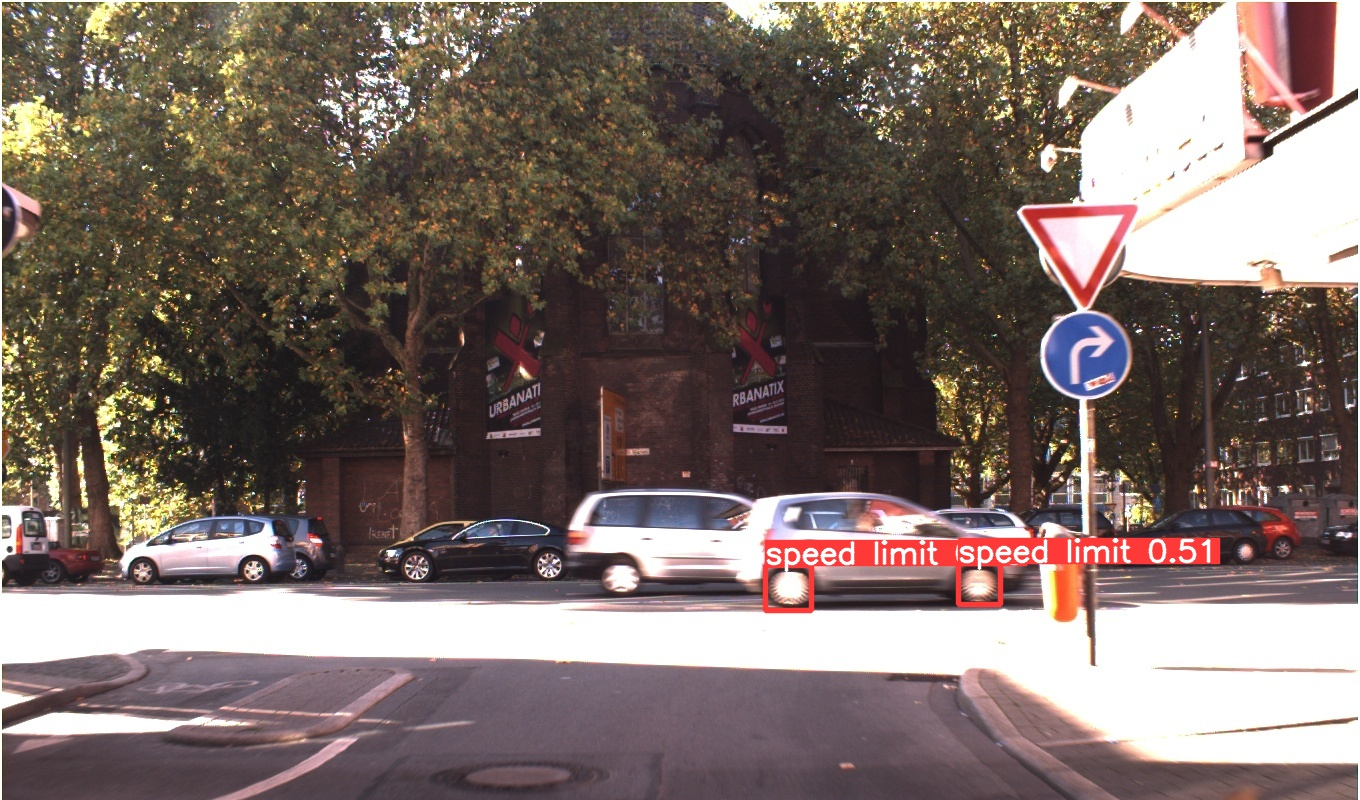

In [23]:
Image(filename='/content/yolov5/yolov5-master/yolov5-master/runs/detect/exp3/00040.jpg', width=416)

In [24]:
!python /content/yolov5/yolov5-master/yolov5-master/detect.py --source /content/project/archiveeee/dataset/images/val/00086.jpg --weights /content/yolov5/yolov5-master/yolov5-master/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/yolov5-master/yolov5-master/runs/train/exp/weights/best.pt'], source=/content/project/archiveeee/dataset/images/val/00086.jpg, data=yolov5-master/yolov5-master/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5-master/yolov5-master/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-2-2 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/project/archiveeee/dataset/images/val/00086.jpg: 384x640 1 yield, 278.1ms
Speed: 5.9ms pre-process, 278.1ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5-master/yolov5-master/runs/detect/e

In [25]:
!ls /content/yolov5/yolov5-master/yolov5-master/runs/detect/exp4

00086.jpg


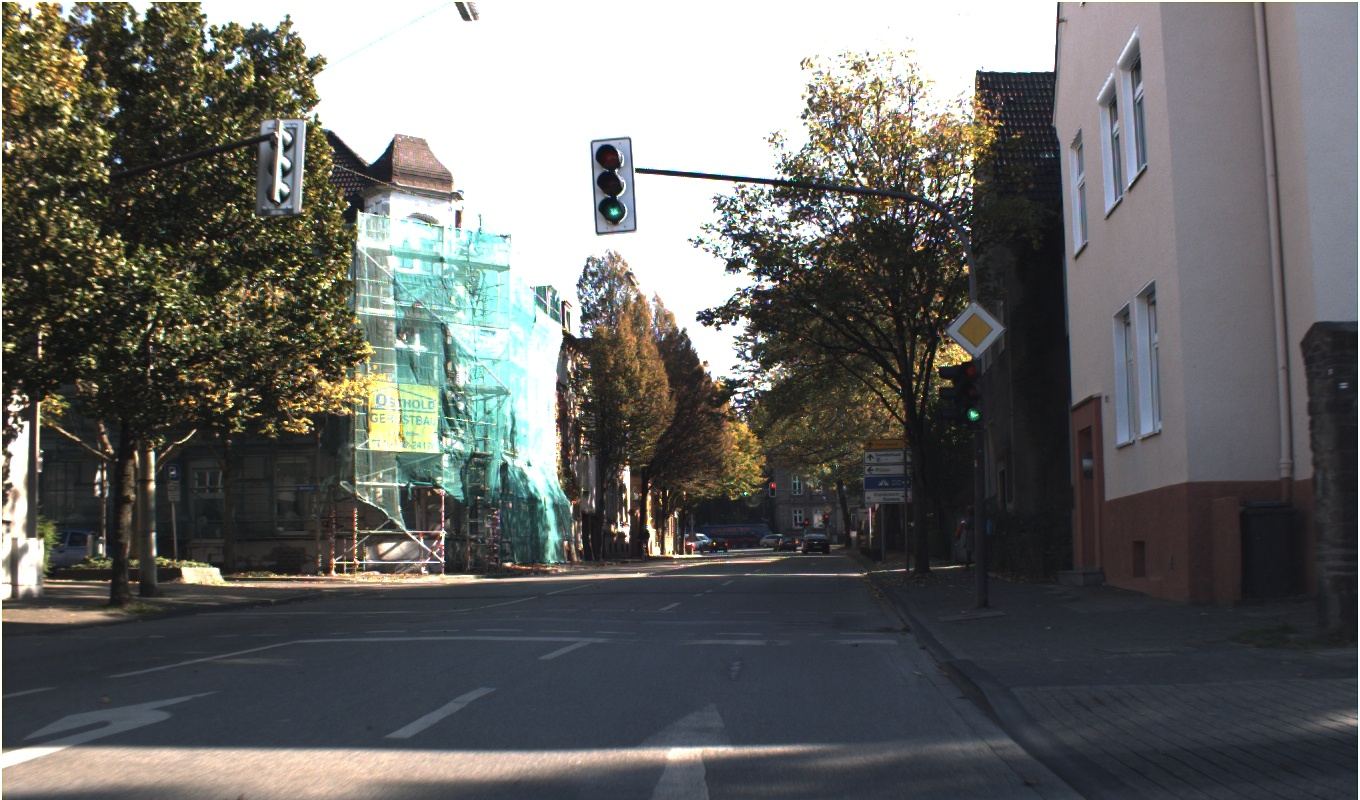

In [26]:
Image(filename='/content/project/archiveeee/dataset/images/val/00086.jpg', width=416)

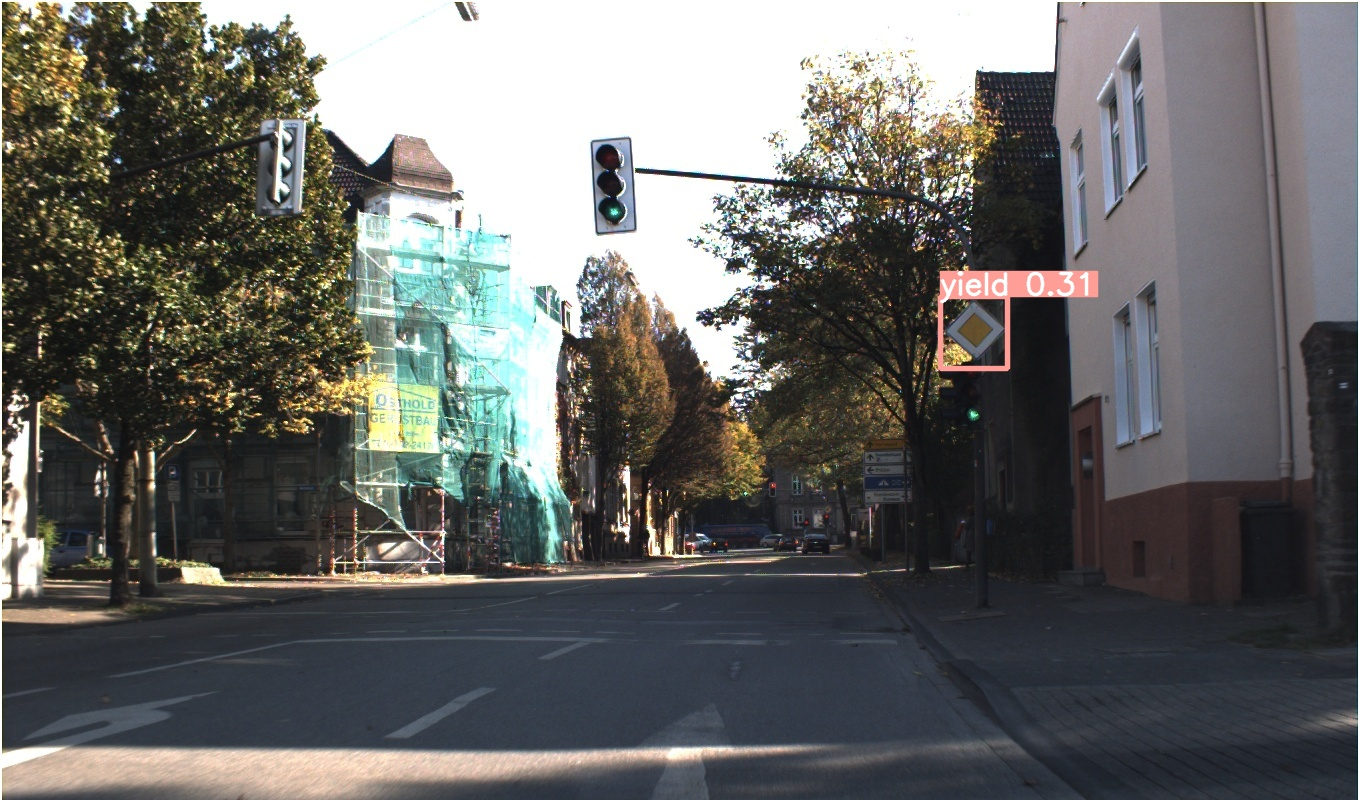

In [27]:
Image(filename='/content/yolov5/yolov5-master/yolov5-master/runs/detect/exp4/00086.jpg', width=416)

In [32]:
!python /content/yolov5/yolov5-master/yolov5-master/detect.py --source /content/project/archiveeee/dataset/images/val/00200.jpg --weights /content/yolov5/yolov5-master/yolov5-master/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/yolov5-master/yolov5-master/runs/train/exp/weights/best.pt'], source=/content/project/archiveeee/dataset/images/val/00200.jpg, data=yolov5-master/yolov5-master/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5-master/yolov5-master/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-2-2 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/project/archiveeee/dataset/images/val/00200.jpg: 384x640 2 speed limits, 275.4ms
Speed: 2.2ms pre-process, 275.4ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5-master/yolov5-master/runs/d

In [33]:
!ls /content/yolov5/yolov5-master/yolov5-master/runs/detect/exp6

00200.jpg


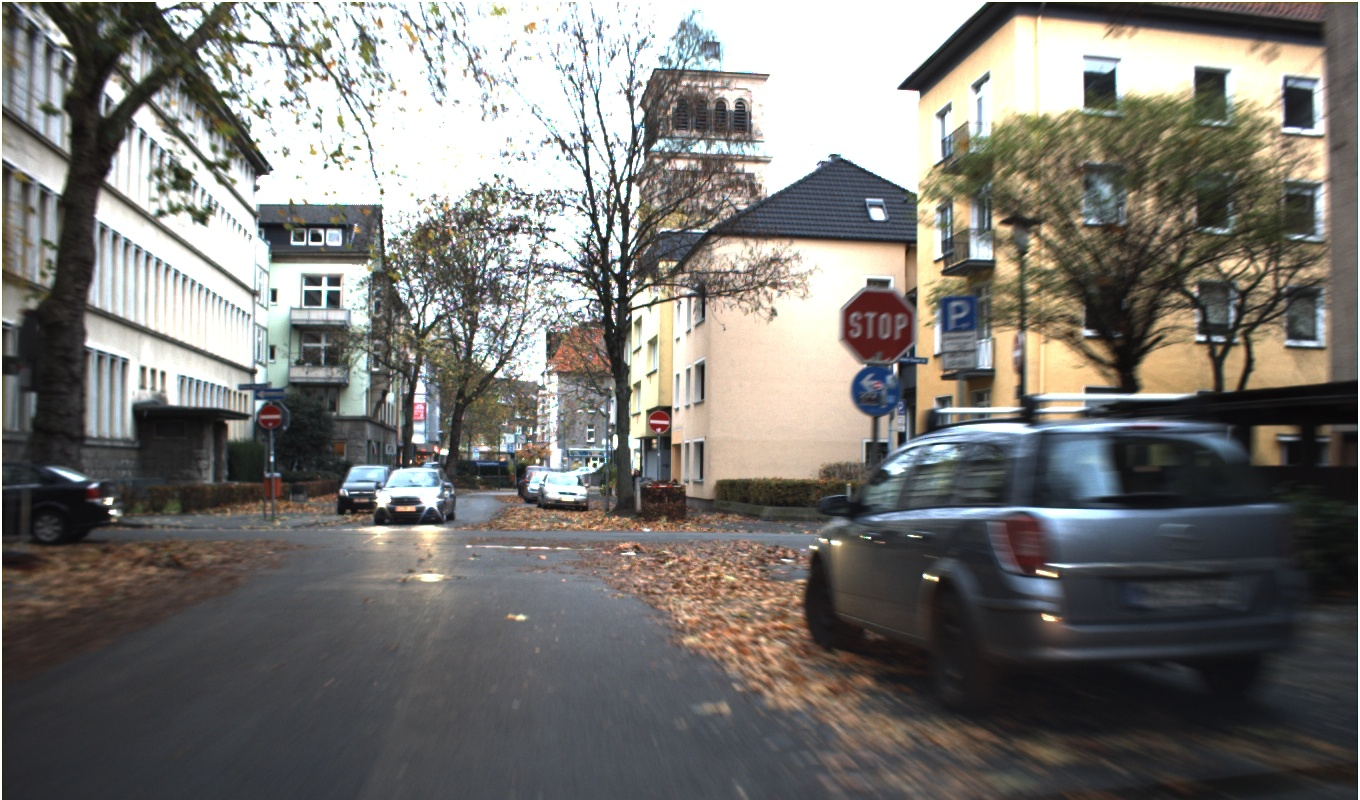

In [34]:
Image(filename='/content/project/archiveeee/dataset/images/val/00200.jpg', width=416)

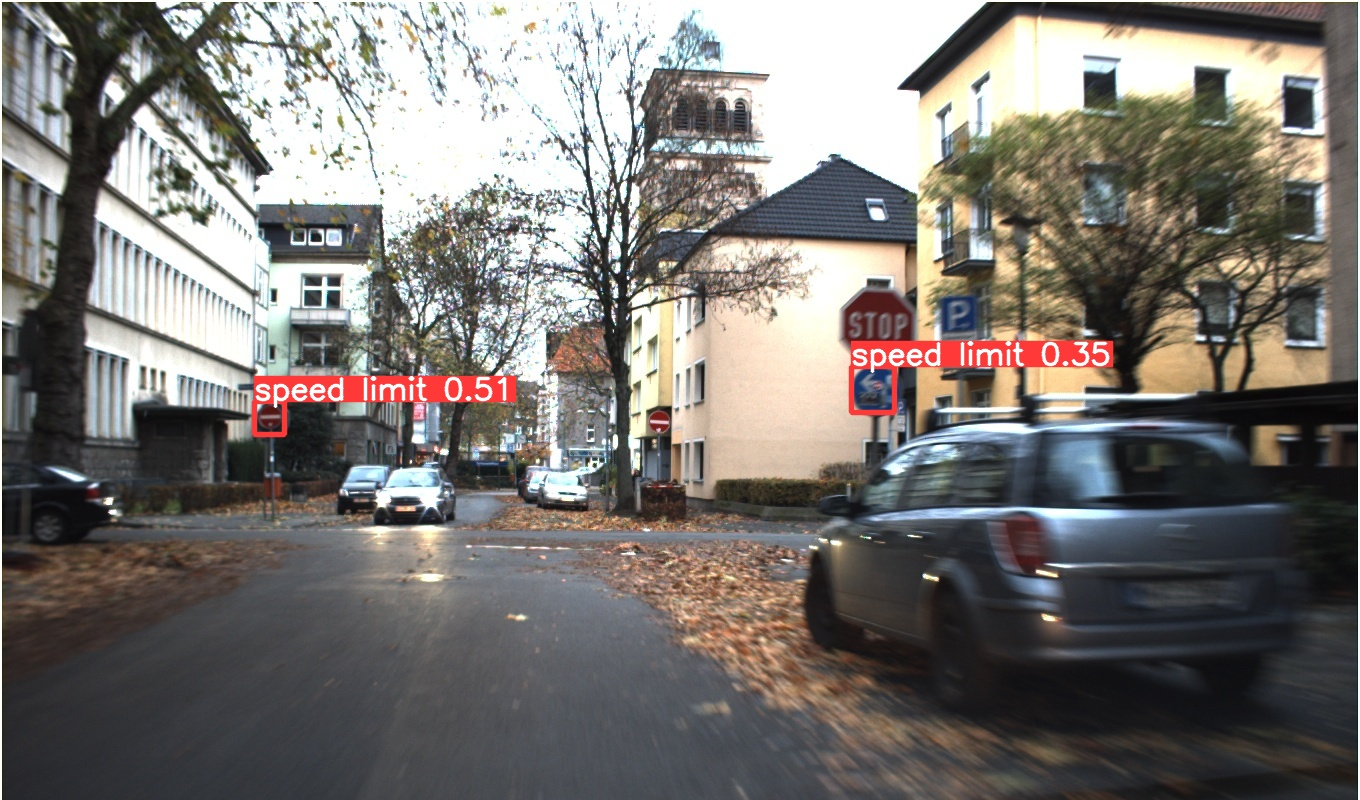

In [35]:
Image(filename='/content/yolov5/yolov5-master/yolov5-master/runs/detect/exp6/00200.jpg', width=416)

In [36]:
!python /content/yolov5/yolov5-master/yolov5-master/detect.py --source /content/project/archiveeee/dataset/images/val/00222.jpg --weights /content/yolov5/yolov5-master/yolov5-master/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/yolov5-master/yolov5-master/runs/train/exp/weights/best.pt'], source=/content/project/archiveeee/dataset/images/val/00222.jpg, data=yolov5-master/yolov5-master/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5-master/yolov5-master/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-2-2 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/project/archiveeee/dataset/images/val/00222.jpg: 384x640 1 speed limit, 285.9ms
Speed: 2.1ms pre-process, 285.9ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5-master/yolov5-master/runs/de

In [37]:
!ls /content/yolov5/yolov5-master/yolov5-master/runs/detect/exp7

00222.jpg


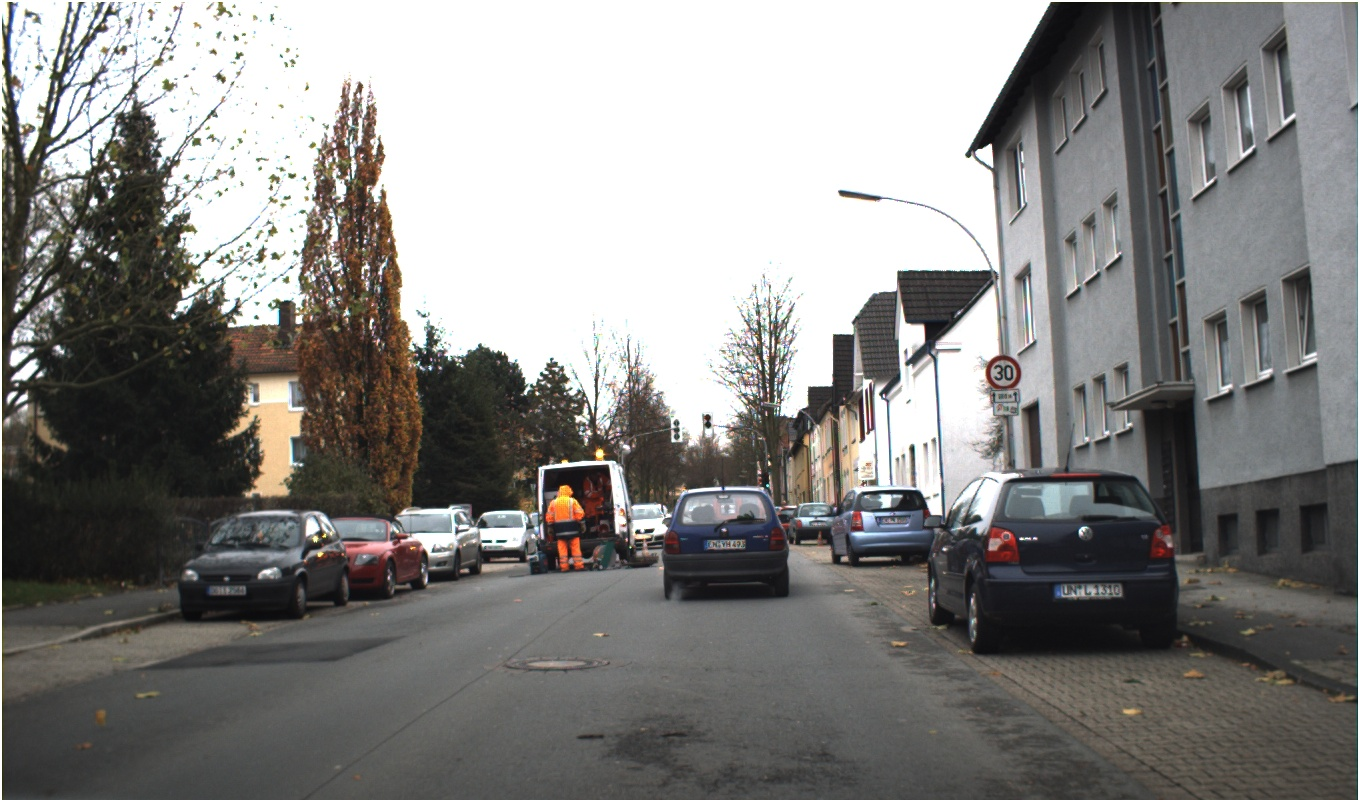

In [38]:
Image(filename='/content/project/archiveeee/dataset/images/val/00222.jpg', width=416)

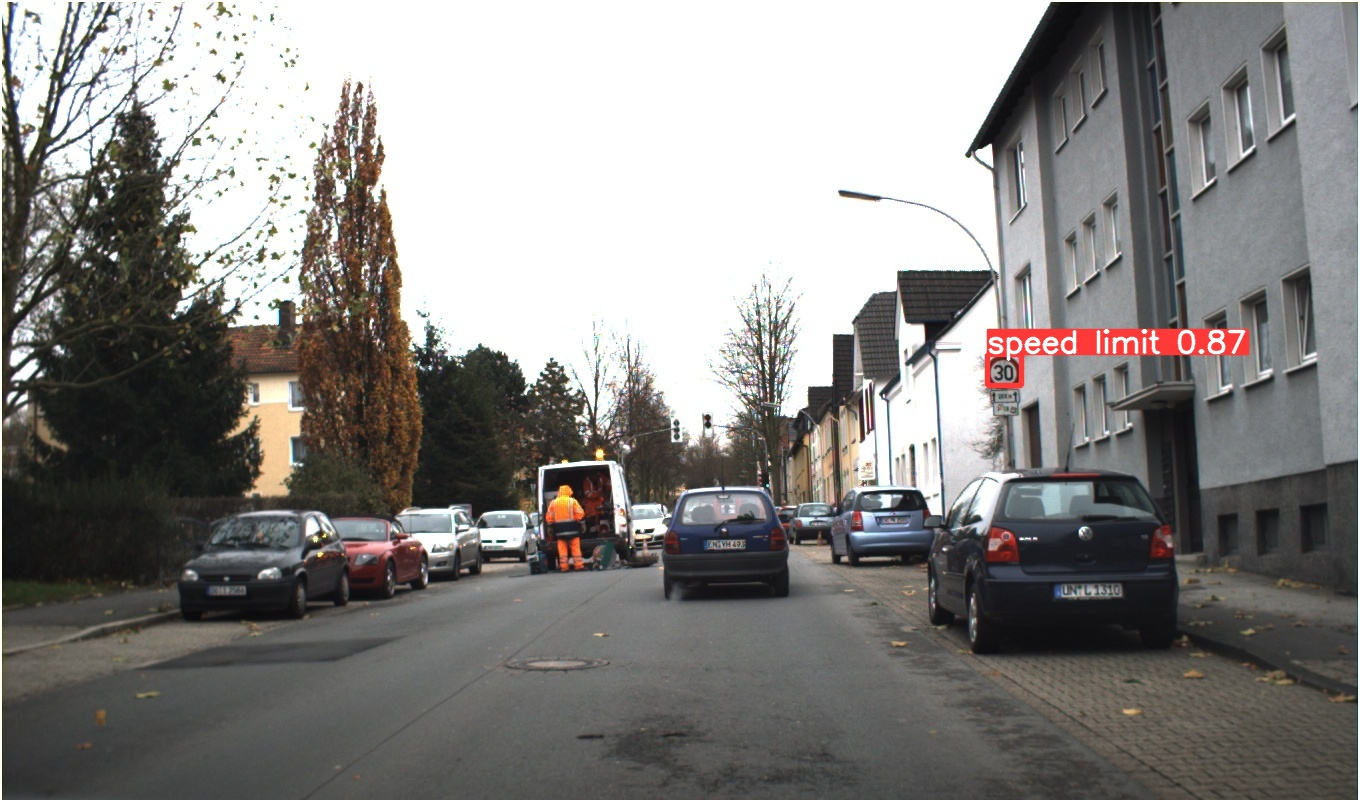

In [39]:
Image(filename='/content/yolov5/yolov5-master/yolov5-master/runs/detect/exp7/00222.jpg', width=416)

In [40]:
!python /content/yolov5/yolov5-master/yolov5-master/detect.py --source /content/project/archiveeee/dataset/images/val/00367.jpg --weights /content/yolov5/yolov5-master/yolov5-master/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/yolov5-master/yolov5-master/runs/train/exp/weights/best.pt'], source=/content/project/archiveeee/dataset/images/val/00367.jpg, data=yolov5-master/yolov5-master/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5-master/yolov5-master/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-2-2 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/project/archiveeee/dataset/images/val/00367.jpg: 384x640 4 speed limits, 259.0ms
Speed: 2.7ms pre-process, 259.0ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5-master/yolov5-master/runs/d

In [41]:
!ls /content/yolov5/yolov5-master/yolov5-master/runs/detect/exp8

00367.jpg


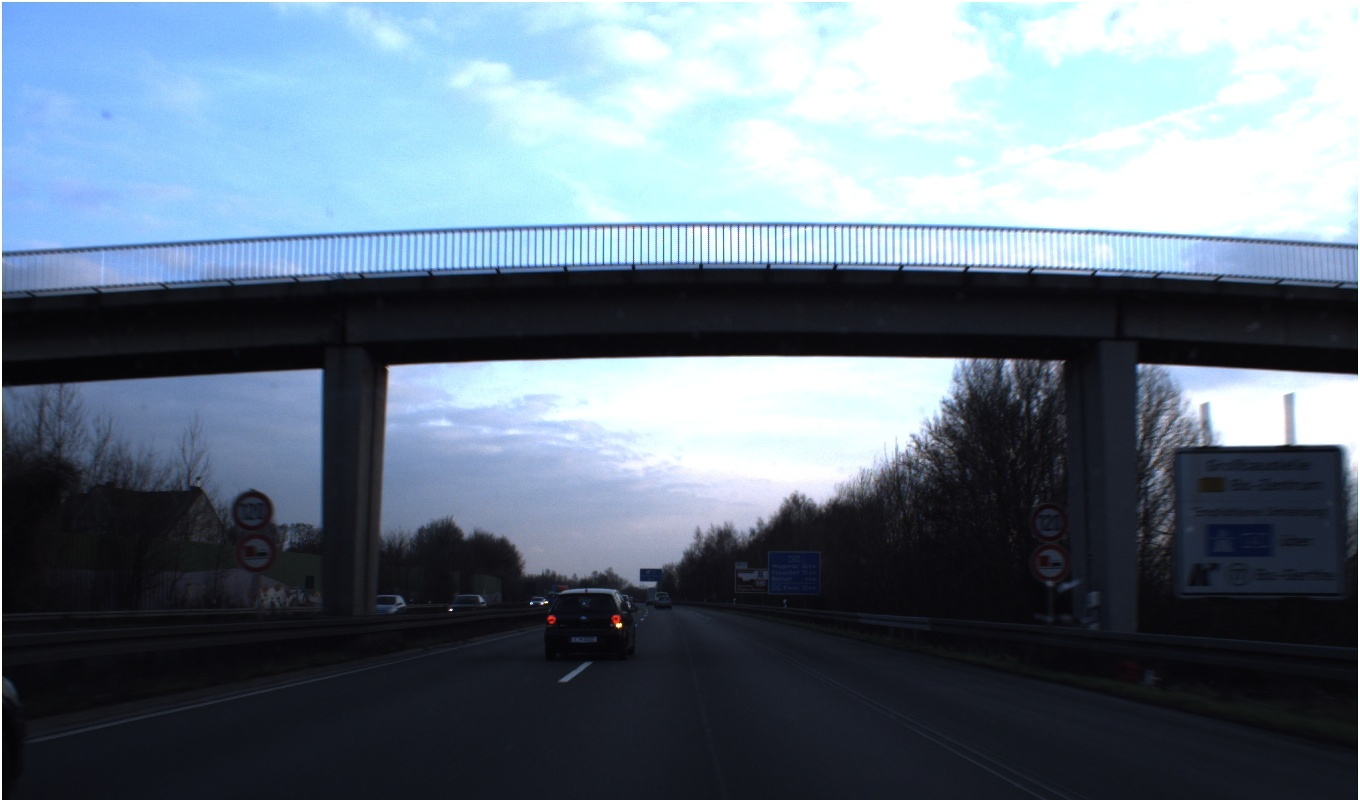

In [42]:
Image(filename='/content/project/archiveeee/dataset/images/val/00367.jpg', width=416)

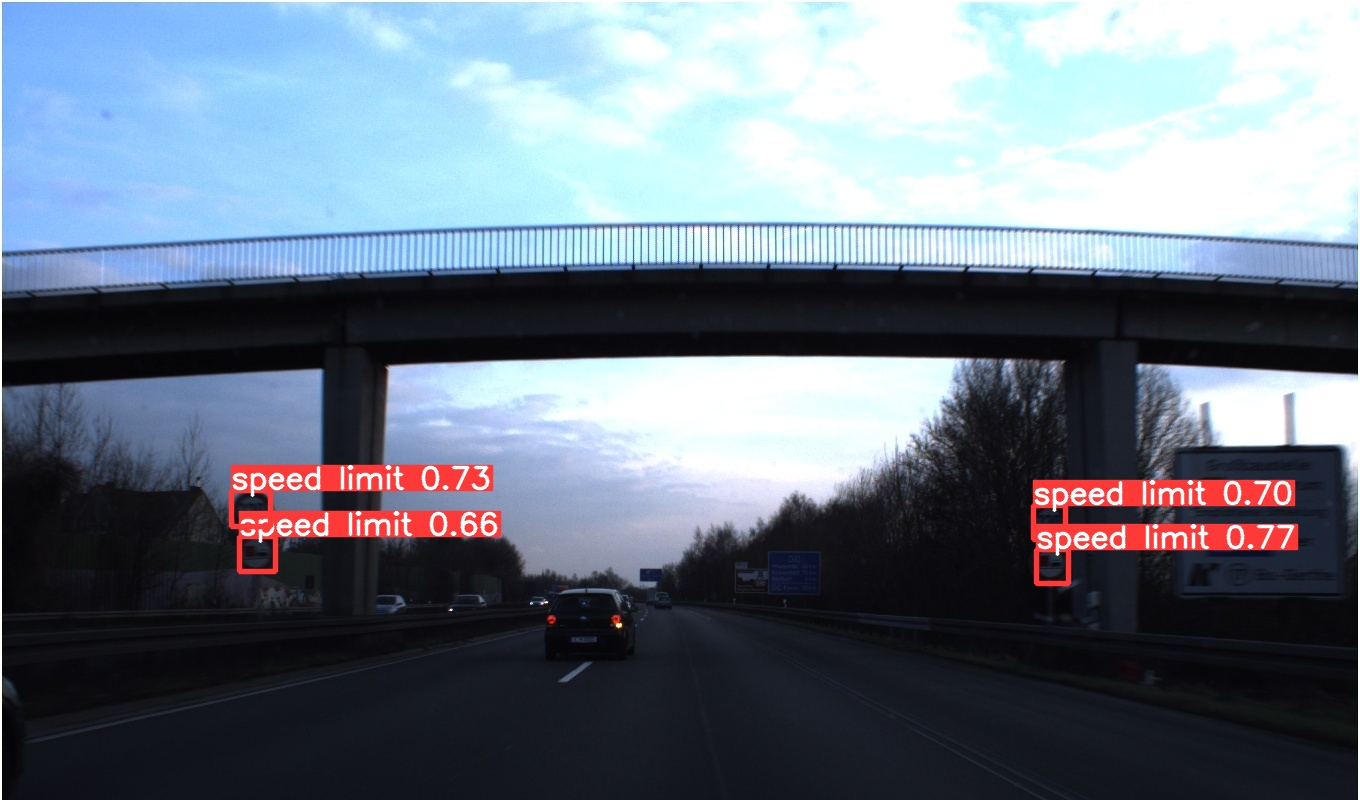

In [43]:
Image(filename='/content/yolov5/yolov5-master/yolov5-master/runs/detect/exp8/00367.jpg', width=416)